<a href="https://colab.research.google.com/github/Pratyasha-Tapaja/EDA-FE-MA-Model/blob/main/age_group_editing_DS_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("workout_fitness_tracker_data.csv")
df.head()
df.info()
df.isnull().sum()
df.duplicated().sum()
print(df.describe())
df.head()

Saving workout_fitness_tracker_data.csv to workout_fitness_tracker_data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null 

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


Saving workout_fitness_tracker_data.xlsx to workout_fitness_tracker_data (1).xlsx
   User ID  Age Gender   Height   Weight  Workout Type   Duration   Calories   \
0        1   39    Male      175       99      Cycling          79        384   
1        2   36   Other      157      112       Cardio          73        612   
2        3   25  Female      180       66         HIIT          27        540   
3        4   56    Male      154       89      Cycling          39        672   
4        5   53   Other      194       59     Strength          56        410   

   Heart_Rate   Steps Taken  Distance (km) Workout Intensity  Sleep Hours  \
0          112         8850          14.44              High          8.2   
1          168         2821           1.10              High          8.6   
2          133        18898           7.28              High          9.8   
3          118        14102           6.55            Medium          5.8   
4          170        16518           3.17    

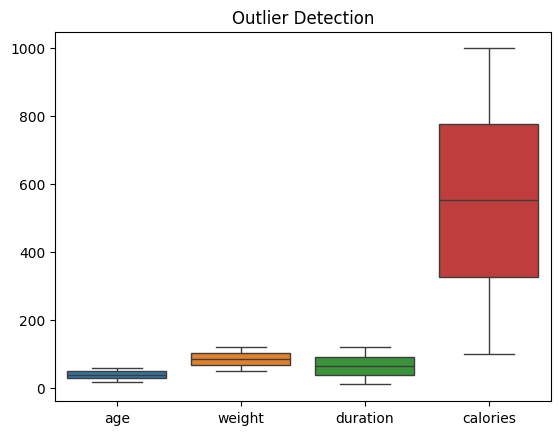

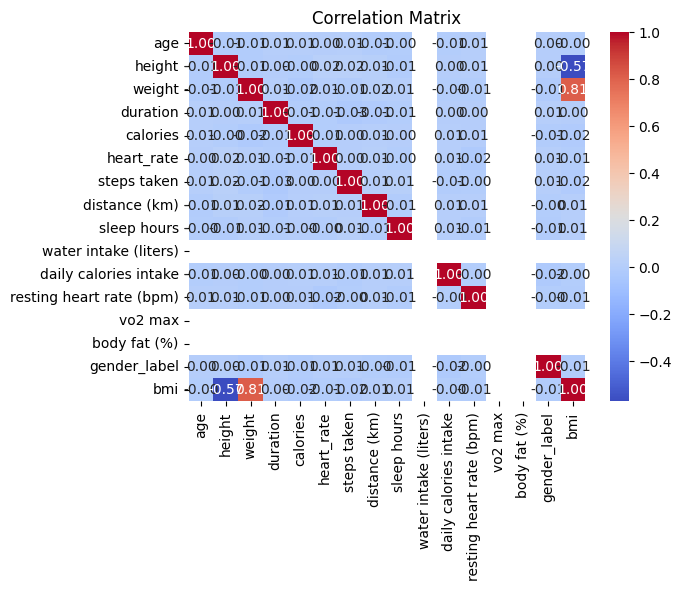

Bins: [0, 17, 23, 29, 35, 41, 47, 53, 59, inf]
Labels: ['<18', '18-23', '24-29', '30-35', '36-41', '42-47', '48-53', '54-59', '60+']
Check: 9 == 9
age_group
<18         0
18-23    1472
24-29    1424
30-35    1449
36-41    1402
42-47    1393
48-53    1431
54-59    1429
60+         0
Name: count, dtype: int64
                age        height        weight      duration      calories  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      38.390100    174.275100     84.903000     64.464800    552.100800   
std       12.171637     14.440986     20.189937     31.814946    260.629908   
min       18.000000    150.000000     50.000000     10.000000    100.000000   
25%       28.000000    162.000000     67.000000     37.000000    325.000000   
50%       38.000000    174.000000     85.000000     64.000000    554.000000   
75%       49.000000    187.000000    102.000000     92.000000    776.000000   
max       59.000000    199.000000    119.000000    119.0000

In [ ]:
from google.colab import files
uploaded = files.upload()

# ✅ STEP 2: Import libraries
import pandas as pd

df = pd.read_excel("workout_fitness_tracker_data.xlsx")

# ✅ STEP 4: Initial checks
print(df.head())
print(df.info())
print(df.isnull().sum())
print("Number of duplicates:", df.duplicated().sum())
print(df.describe())

# ✅ STEP 5: Drop duplicate rows
df.drop_duplicates(inplace=True)

# ✅ STEP 6: Drop 'User ID' column if present (case insensitive)
df.columns = df.columns.str.strip()  # clean spaces first
if 'User ID' in df.columns:
    df.drop("User ID", axis=1, inplace=True)

# ✅ STEP 7: Standardize all column names to lowercase
df.columns = df.columns.str.strip().str.lower()
print("Columns after standardizing:", df.columns.tolist())

# ✅ STEP 8: Convert numeric columns
cols_to_convert = ['age', 'height', 'weight', 'duration', 'heart_rate', 'calories']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ✅ STEP 9: Drop rows with NA in key numeric columns
df.dropna(subset=cols_to_convert, inplace=True)

print(df.columns)
df['gender'] = df['gender'].str.strip().str.lower()
# STEP 10: Standardize and encode 'gender'
df['gender_label'] = df['gender'].str.strip().str.lower()  # Use the original column name here!
df['gender_label'] = df['gender_label'].map({'male': 0, 'female': 1, 'other': 2})

# ✅ STEP 11: Calculate BMI
df['height_m'] = df['height'] / 100
df['bmi'] = df['weight'] / (df['height_m'] ** 2)
df.drop(columns=['height_m'], inplace=True)

# ✅ STEP 12: Check final info & stats
print(df.info())
print(df.describe())

# ✅ STEP 13: Outlier detection boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df[['age', 'weight', 'duration', 'calories']])
plt.title("Outlier Detection")
plt.show()

# ✅ STEP 14: Correlation matrix (safe)
corr_matrix = df.select_dtypes(include='number').corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# ✅ STEP 15: Create BMI category
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)

# ✅ STEP 16: Create age groups
# ✅ Correct
import numpy as np
bins = [0, 17, 23, 29, 35, 41, 47, 53, 59, np.inf]
labels = ['<18', '18-23', '24-29', '30-35', '36-41', '42-47', '48-53', '54-59', '60+']

print("Bins:", bins)
print("Labels:", labels)
print("Check:", len(bins)-1, "==", len(labels))

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

print(df['age_group'].value_counts().sort_index())


# ✅ STEP 17: Save cleaned file
df.to_csv("workout_fitness_tracker_dataE1 agegrouping.csv", index=False)

# ✅ STEP 18: Final stats & peek
print(df.describe())
print(df.head())


In [ ]:
from google.colab import files
files.download("workout_fitness_tracker_dataE1 agegrouping.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("workout_fitness_tracker_dataE1 agegrouping (1).csv")
df.head()
df.info()
df.isnull().sum()
df.duplicated().sum()
print(df.describe())
df.head()

Saving workout_fitness_tracker_dataE1 agegrouping (1).csv to workout_fitness_tracker_dataE1 agegrouping (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       10000 non-null  int64  
 1   gender                    10000 non-null  object 
 2   height                    10000 non-null  int64  
 3   weight                    10000 non-null  int64  
 4   workout type              10000 non-null  object 
 5   duration                  10000 non-null  int64  
 6   calories                  10000 non-null  int64  
 7   heart_rate                10000 non-null  int64  
 8   steps taken               10000 non-null  int64  
 9   distance (km)             10000 non-null  float64
 10  workout intensity         10000 non-null  object 
 11  sleep hours               10000 non-null  float64
 12  water

,age,gender,height,weight,workout type,duration,calories,heart_rate,steps taken,distance (km),...,daily calories intake,resting heart rate (bpm),vo2 max,body fat (%),mood before workout,mood after workout,gender_label,bmi,bmi_category,age_group
0,39,male,175,99,Cycling,79,384,112,8850,14.44,...,3195,61,38.4,28.5,Tired,Fatigued,0,32.326531,Obese,36-41
1,36,other,157,112,Cardio,73,612,168,2821,1.10,...,2541,73,38.4,28.5,Happy,Energized,2,45.437949,Obese,36-41
2,25,female,180,66,HIIT,27,540,133,18898,7.28,...,3362,80,38.4,28.5,Happy,Fatigued,1,20.370370,Normal,24-29
3,56,male,154,89,Cycling,39,672,118,14102,6.55,...,2071,65,38.4,28.5,Neutral,Neutral,0,37.527408,Obese,54-59
4,53,other,194,59,Strength,56,410,170,16518,3.17,...,3298,59,38.4,28.5,Stressed,Energized,2,15.676480,Underweight,48-53


In [ ]:
import pandas as pd

# Replace with your actual file name
df = pd.read_csv("workout_fitness_tracker_dataE1 agegrouping (1).csv")

print(df.head())
# Count rows where gender is 'other'
num_other = df[df['gender'] == 'other'].shape[0]
print(f"Number of rows with gender 'other': {num_other}")
df_other = df[df['gender'] == 'other']
df_cleaned = df[df['gender'] != 'other']
df_other.to_csv("Only_Gender_Other.csv", index=False)
df_cleaned.to_csv("Dataset_Without_Gender_Other.csv", index=False)

from google.colab import files

files.download("Only_Gender_Other.csv")
files.download("Dataset_Without_Gender_Other.csv")


   age  gender  height  weight workout type  duration  calories  heart_rate  \
0   39    male     175      99      Cycling        79       384         112   
1   36   other     157     112       Cardio        73       612         168   
2   25  female     180      66         HIIT        27       540         133   
3   56    male     154      89      Cycling        39       672         118   
4   53   other     194      59     Strength        56       410         170   

   steps taken  distance (km)  ... daily calories intake  \
0         8850          14.44  ...                  3195   
1         2821           1.10  ...                  2541   
2        18898           7.28  ...                  3362   
3        14102           6.55  ...                  2071   
4        16518           3.17  ...                  3298   

   resting heart rate (bpm)  vo2 max  body fat (%)  mood before workout  \
0                        61     38.4          28.5                Tired   
1             

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("Dataset_Without_Gender_Other (1).csv")
df.head()
df.info()
df.isnull().sum()
df.duplicated().sum()
print(df.describe())
df.head()

Saving Dataset_Without_Gender_Other (1).csv to Dataset_Without_Gender_Other (1) (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       10000 non-null  int64  
 1   gender                    10000 non-null  object 
 2   height                    10000 non-null  int64  
 3   weight                    10000 non-null  int64  
 4   workout type              10000 non-null  object 
 5   duration                  10000 non-null  int64  
 6   calories                  10000 non-null  int64  
 7   heart_rate                10000 non-null  int64  
 8   steps taken               10000 non-null  int64  
 9   distance (km)             10000 non-null  float64
 10  workout intensity         10000 non-null  object 
 11  sleep hours               10000 non-null  float64
 12  water intake (liters)     100

,age,gender,height,weight,workout type,duration,calories,heart_rate,steps taken,distance (km),...,daily calories intake,resting heart rate (bpm),vo2 max,body fat (%),mood before workout,mood after workout,gender_label,bmi,bmi_category,age_group
0,39,male,175,99,Cycling,79,384,112,8850,14.44,...,3195,61,38.4,28.5,Tired,Fatigued,0,32.326531,Obese,36-41
1,36,other,157,112,Cardio,73,612,168,2821,1.10,...,2541,73,38.4,28.5,Happy,Energized,2,45.437949,Obese,36-41
2,25,female,180,66,HIIT,27,540,133,18898,7.28,...,3362,80,38.4,28.5,Happy,Fatigued,1,20.370370,Normal,24-29
3,56,male,154,89,Cycling,39,672,118,14102,6.55,...,2071,65,38.4,28.5,Neutral,Neutral,0,37.527408,Obese,54-59
4,53,other,194,59,Strength,56,410,170,16518,3.17,...,3298,59,38.4,28.5,Stressed,Energized,2,15.676480,Underweight,48-53


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("Only_Gender_Other (2).csv")
df.head()
df.info()
df.isnull().sum()
df.duplicated().sum()
print(df.describe())
df.head()

Saving Only_Gender_Other (2).csv to Only_Gender_Other (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       3392 non-null   int64  
 1   gender                    3392 non-null   object 
 2   height                    3392 non-null   int64  
 3   weight                    3392 non-null   int64  
 4   workout type              3392 non-null   object 
 5   duration                  3392 non-null   int64  
 6   calories                  3392 non-null   int64  
 7   heart_rate                3392 non-null   int64  
 8   steps taken               3392 non-null   int64  
 9   distance (km)             3392 non-null   float64
 10  workout intensity         3392 non-null   object 
 11  sleep hours               3392 non-null   float64
 12  water intake (liters)     3392 non-null   float64
 13  d

,age,gender,height,weight,workout type,duration,calories,heart_rate,steps taken,distance (km),...,daily calories intake,resting heart rate (bpm),vo2 max,body fat (%),mood before workout,mood after workout,gender_label,bmi,bmi_category,age_group
0,36,other,157,112,Cardio,73,612,168,2821,1.10,...,2541,73,38.4,28.5,Happy,Energized,2,45.437949,Obese,36-41
1,53,other,194,59,Strength,56,410,170,16518,3.17,...,3298,59,38.4,28.5,Stressed,Energized,2,15.676480,Underweight,48-53
2,37,other,182,113,Running,25,226,123,9372,13.24,...,3760,53,38.4,28.5,Tired,Neutral,2,34.114237,Obese,36-41
3,28,other,167,84,Yoga,31,292,147,3478,13.49,...,1893,51,38.4,28.5,Stressed,Fatigued,2,30.119402,Obese,24-29
4,46,other,185,112,HIIT,111,761,85,17568,10.90,...,2184,57,38.4,28.5,Tired,Neutral,2,32.724617,Obese,42-47
